In [3]:
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
    return np.sin(np.sqrt(2) * x) * np.sin(2 * x)

In [5]:
num_points = 10000
x_min, x_max = - np.pi, 3 * np.pi
x = np.linspace(x_min, x_max, num_points)

In [6]:
model = Sequential()
model.add(Dense(256, input_dim=1, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))
model.summary()
model.compile(loss='mse', 
              optimizer='nadam',
              metrics=['mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 41,729
Trainable params: 41,729
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x, f(x),
                    batch_size=64, 
                    epochs=20, 
                    verbose=1)

Epoch 1/20
10000/10000 [==============================] - 1s 92us/step - loss: 0.2054 - mean_absolute_error: 0.3693
Epoch 2/20
10000/10000 [==============================] - 0s 46us/step - loss: 0.1778 - mean_absolute_error: 0.3492
Epoch 3/20
10000/10000 [==============================] - 1s 61us/step - loss: 0.1410 - mean_absolute_error: 0.3213
Epoch 4/20
10000/10000 [==============================] - 1s 51us/step - loss: 0.1259 - mean_absolute_error: 0.3118
Epoch 5/20
10000/10000 [==============================] - 1s 64us/step - loss: 0.1205 - mean_absolute_error: 0.3082
Epoch 6/20
10000/10000 [==============================] - 1s 62us/step - loss: 0.1169 - mean_absolute_error: 0.3040
Epoch 7/20
10000/10000 [==============================] - 1s 72us/step - loss: 0.1124 - mean_absolute_error: 0.2979
Epoch 8/20
10000/10000 [==============================] - 1s 63us/step - loss: 0.1071 - mean_absolute_error: 0.2889
Epoch 9/20
10000/10000 [==============================] - 1s 66us/step -

<IPython.core.display.Javascript object>


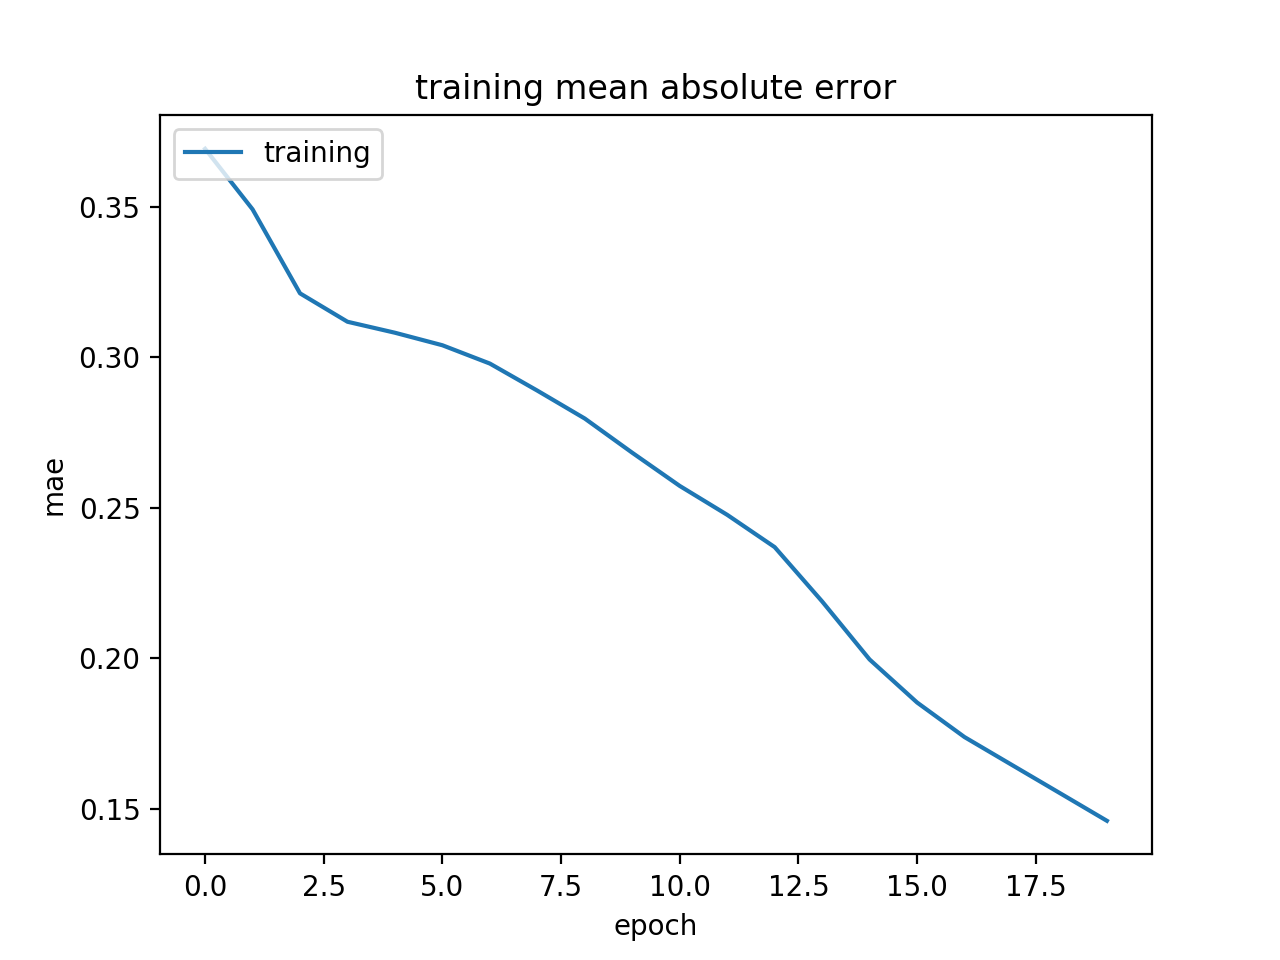

In [8]:
%matplotlib notebook
plt.plot(history.history['mean_absolute_error'])
plt.title('training mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


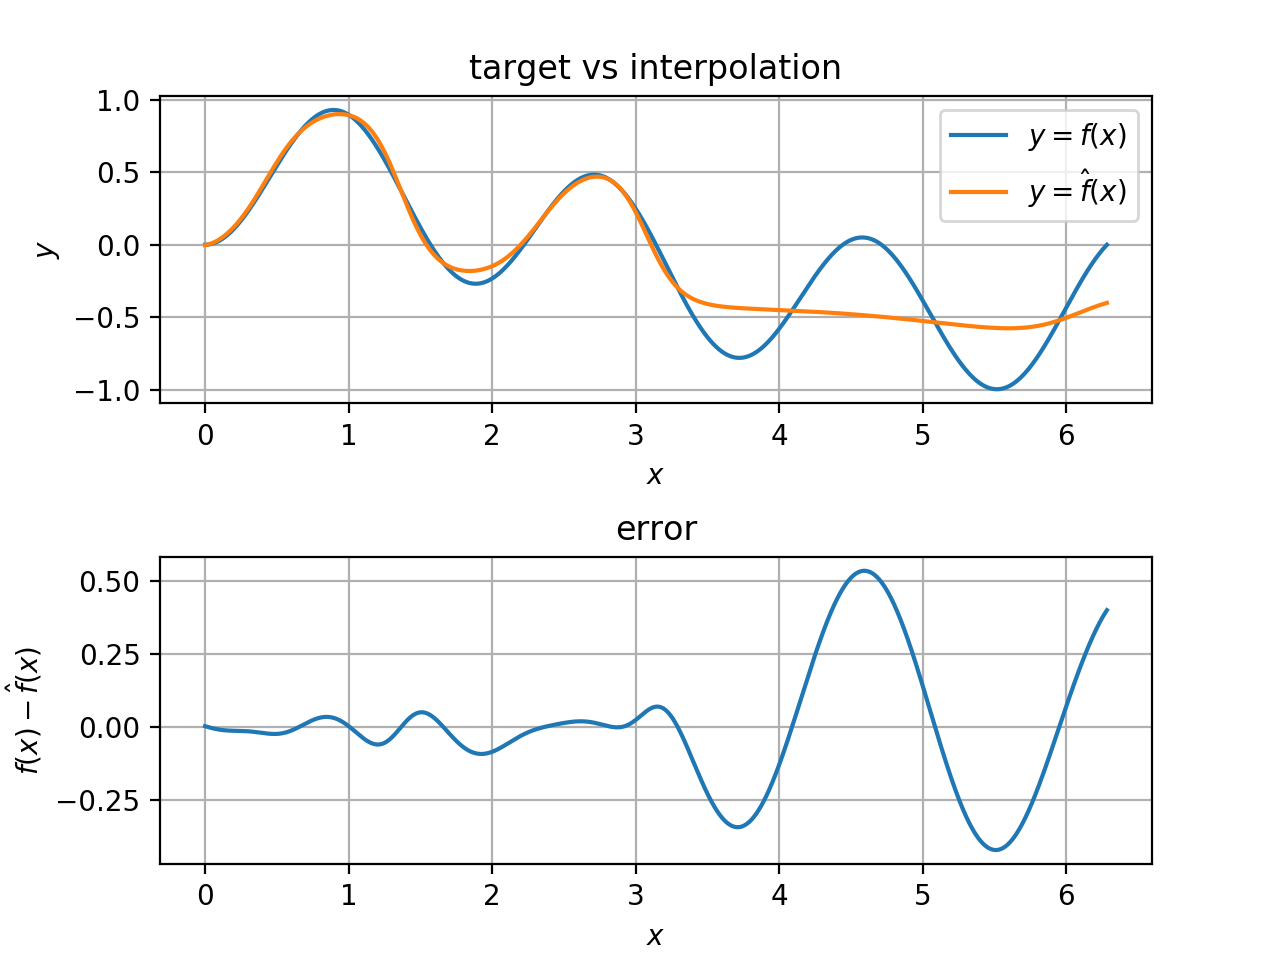

Maximum absolute error = 0.54


In [9]:
x_def = x[np.where((x[:] >= 0) & (x[:] <= 2 * np.pi))]
y_pred = model.predict(x_def).flatten() 
y_true = f(x_def)
error = y_true - y_pred

%matplotlib notebook
fig, axs = plt.subplots(2, 1)
fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                wspace=0.2, hspace=0.5)

l1, l2 = axs[0].plot(x_def, y_true, x_def, y_pred)
axs[0].set_title('target vs interpolation')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].grid(True)
axs[0].legend((l1, l2), ('$y=f(x)$','$y=\hat{f}(x)$'))


l3 = axs[1].plot(x_def, error)            
axs[1].set_title('error')
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$f(x) - \hat{f}(x)$')    
axs[1].grid(True)

   
plt.show()
print('Maximum absolute error = {:.2}'.format(np.max(np.abs(error))))